# Hands-on: Geospatial Data with `geopandas`

This hands-on will introduce you to `geopandas` which allows you to read in _vector_ spatial data and also visualize it which builds on your tool set for exploratory data analysis and visualization.

If you're interested in knowing how to handle _raster_ data, there's a library called [rasterio](https://rasterio.readthedocs.io/en/stable/).

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely.geometry import Point

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Reading Files

`geopandas` is built mainly for vector-based spatial data. It utilizes the [`fiona`](https://fiona.readthedocs.io/en/latest/README.html) library which is capable of reading and writing a variety of GIS-formats.

For this class, we will focus on loading data from **shapefiles and GeoJSON formats**.

The main function to read in these files is `gpd.read_file`.

In [2]:
gpd.read_file?

### Shapefile

Download the geometric administrative boundaries of the Philippines from GADM.

GADM Philippines: https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_PHL_shp.zip

Note that this is a ZIP file. Unzip the main folder to DSDATA and keep the folder structure within as is.

In [3]:
# Read shapefile
ph = gpd.read_file(os.getenv('DSDATA') + '/gadm36_PHL_shp/gadm36_PHL_1.shp')
ph.head(50)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,PHL,Philippines,PHL.1_1,Abra,None,None,Lalawigan|Probinsya,Province,1401,PH.AB,"POLYGON ((120.77473 17.16318, 120.76637 17.159..."
1,PHL,Philippines,PHL.2_1,Agusan del Norte,None,None,Lalawigan|Probinsya,Province,1602,PH.AN,"POLYGON ((125.44627 8.66631, 125.44199 8.66333..."
2,PHL,Philippines,PHL.3_1,Agusan del Sur,None,None,Lalawigan|Probinsya,Province,1603,PH.AS,"POLYGON ((125.90923 7.99845, 125.90176 7.99794..."
3,PHL,Philippines,PHL.4_1,Aklan,None,None,Lalawigan|Probinsya,Province,604,PH.AK,"MULTIPOLYGON (((122.42083 11.63194, 122.42000 ..."
4,PHL,Philippines,PHL.5_1,Albay,None,None,Lalawigan|Probinsya,Province,505,PH.AL,"MULTIPOLYGON (((123.28764 13.04923, 123.28686 ..."
5,PHL,Philippines,PHL.6_1,Antique,None,None,Lalawigan|Probinsya,Province,606,PH.AQ,"MULTIPOLYGON (((121.92085 10.42076, 121.92107 ..."
6,PHL,Philippines,PHL.7_1,Apayao,None,None,Lalawigan|Probinsya,Province,1481,PH.AP,"POLYGON ((121.43056 17.72600, 121.43214 17.724..."
7,PHL,Philippines,PHL.8_1,Aurora,None,None,Lalawigan|Probinsya,Province,377,PH.AU,"MULTIPOLYGON (((121.57475 15.59574, 121.57412 ..."
8,PHL,Philippines,PHL.9_1,Basilan,None,None,Lalawigan|Probinsya,Province,1507,PH.BS,"MULTIPOLYGON (((121.96861 6.28222, 121.96806 6..."
9,PHL,Philippines,PHL.10_1,Bataan,None,None,Lalawigan|Probinsya,Province,308,PH.BA,"MULTIPOLYGON (((120.62363 14.36788, 120.62368 ..."


In [4]:
type(ph)

geopandas.geodataframe.GeoDataFrame

(116.444486621, 127.08919715899998, 3.7627797585000007, 21.894300891500002)

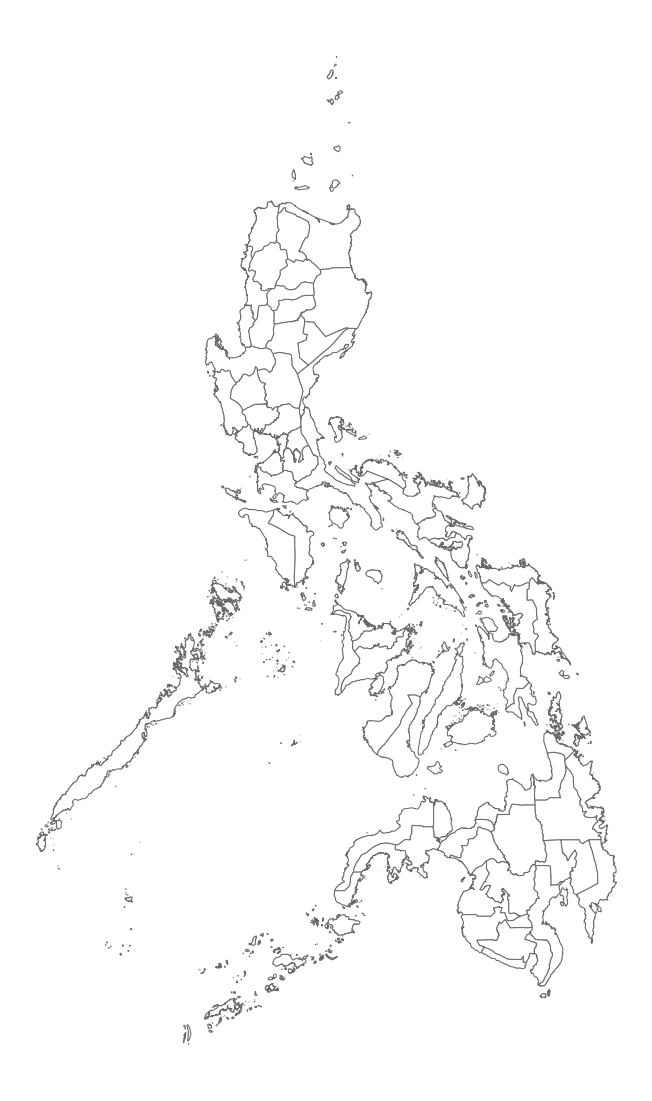

In [5]:
ax = ph.plot(figsize=(30,20), color="w", edgecolor="dimgray")

ax.axis('off')

### GeoJSON

For GeoJSON, you must specify the `driver='GeoJSON'` to the `read_file` function.

The data below is from the Humanitarian Data Exchange. Download it and place it in `DSDATA` as well.

Philippine Health Sites: https://data.humdata.org/dataset/20e5069f-1eb8-465b-98c8-3442a62cd3f0/resource/ca65b30e-02c8-4fad-8771-fb220ddc444f/download/philippines.geojson

In [6]:
# Read GeoJSON file
healthsites = gpd.read_file(os.getenv('DSDATA') + '/philippines.geojson', driver='GeoJSON')
healthsites.head()

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,part_time_beds,tag,geometry
0,4714668590,node,9.0,,pharmacy,,,,,46542719.0,...,Innoc,,,,,,,None,None,POINT (122.63445 10.94470)
1,6489465986,node,9.0,,doctors,,,,,70494207.0,...,RenAshbell,,,,,,,None,None,POINT (124.24163 8.22731)
2,775561027,way,31.0,,hospital,,Dalan na Pagayaya,Department of Health,,81346192.0,...,mapbeks,,,,,hospital,government,None,None,"POLYGON ((121.74563 17.65639, 121.74616 17.657..."
3,497119467,node,15.0,,pharmacy,,Shorthorn,,,86331991.0,...,mipangan,,,,,,,None,None,POINT (121.02008 14.66840)
4,601647960,way,12.0,,hospital,,,,,60145823.0,...,GOwin,,,,,,,None,None,"POLYGON ((120.45718 15.80609, 120.45738 15.806..."


### CSV

Sometimes we have data in a normal CSV file but it also contains geographic information in different columns. A common example would be having the longitude and latitude in two separate columns. Since we are aware that there is value in having the data as a geometric point, there is a way to convert two columns to a `Point` using `shapely`.

CitiBike Historical Trip Data: https://s3.amazonaws.com/tripdata/index.html

We should already have the a CitiBike trip data file from the previous lab.

In [7]:
# Read in the data using pandas

citibike = pd.read_csv(os.getenv('DSDATA') + '/202102-citibike-tripdata.csv')
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,304,2021-02-01 00:04:23.0780,2021-02-01 00:09:27.7920,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,4045,West End Ave & W 60 St,40.772370,-73.990050,27451,Subscriber,1996,2
1,370,2021-02-01 00:07:08.8080,2021-02-01 00:13:19.4670,3154,E 77 St & 3 Ave,40.773142,-73.958562,3725,2 Ave & E 72 St,40.768762,-73.958408,35000,Subscriber,1991,1
2,635,2021-02-01 00:07:55.9390,2021-02-01 00:18:31.0390,502,Henry St & Grand St,40.714211,-73.981095,411,E 6 St & Avenue D,40.722281,-73.976687,49319,Subscriber,1980,2
3,758,2021-02-01 00:08:42.0960,2021-02-01 00:21:20.7820,3136,5 Ave & E 63 St,40.766368,-73.971518,3284,E 88 St & Park Ave,40.781411,-73.955959,48091,Customer,1969,0
4,522,2021-02-01 00:09:32.6820,2021-02-01 00:18:15.4100,505,6 Ave & W 33 St,40.749013,-73.988484,3687,E 33 St & 1 Ave,40.743227,-73.974498,48596,Subscriber,1988,1


In [8]:
citibike.shape

(634631, 15)

Since the data is huge, this might take a long time to run because geometric operations is quite expensive (computationally) on a local machine. 

In [9]:
stations = citibike[['end station longitude', 'end station latitude']]

In [10]:
stations.drop_duplicates(inplace=True)
stations.shape

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(1283, 2)

In [11]:
# Create the geometry
geometry = [Point(xy) for xy in zip(stations['end station longitude'], 
                                    stations['end station latitude'])]

# Set the crs
crs = {'init': 'epsg:4326'}

# Create the GeoDataFrame from the DataFrame
citi_gdf = gpd.GeoDataFrame(stations, crs=crs, geometry=geometry)
citi_gdf.head()

,end station longitude,end station latitude,geometry
0,-73.990050,40.772370,POINT (-73.99005 40.77237)
1,-73.958408,40.768762,POINT (-73.95841 40.76876)
2,-73.976687,40.722281,POINT (-73.97669 40.72228)
3,-73.955959,40.781411,POINT (-73.95596 40.78141)
4,-73.974498,40.743227,POINT (-73.97450 40.74323)


## Basic Visualization

With `matplotlib` and `descartes` built into `geopandas`, we can easily plot a `GeoDataFrame` by simply calling the `plot` function. Most of the parameters that come with the `plot` function from `pandas` can also be used here.

(116.444486621, 127.08919715899998, 3.7627797585, 21.894300891499995)

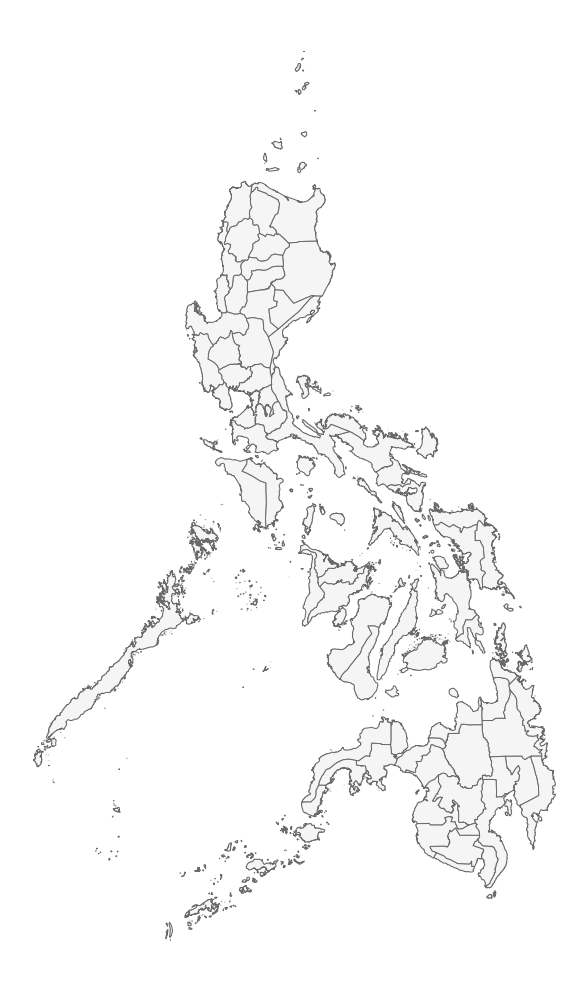

In [12]:
ax = ph.plot(figsize=(15, 18), color='whitesmoke', edgecolor='dimgray')
ax.axis('off')

## Projections
Different datasets would have different projections to minimize the distortion depending on where they are on the globe. When doing spatial analysis, it is normal to be working with multiple datasets in different formats and different projections depending on how they were collected or how they should be presented.

Let us take the example of the New York City Taxi Zones and CitiBike stations. We already have the CitiBike stations from the example above.

- NYC Taxi Zones: https://s3.amazonaws.com/nyc-tlc/misc/taxi_zones.zip

In [21]:
taxi = gpd.read_file(os.getenv('DSDATA') + '/taxi_zones/taxi_zones.shp')
taxi.crs

{'proj': 'lcc',
 'lat_1': 40.66666666666666,
 'lat_2': 41.03333333333333,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

In [ ]:
ax = taxi.plot(figsize=(15, 15), color='white', edgecolor='k')
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.3);

In [ ]:
print('Taxizones CRS', taxi.crs)
print('Citi Bike CRS', citi_gdf.crs)

In [ ]:
# First option is to pass a dictionary like how we initialized the citibike dataframe - this is the CRS
citi_gdf = citi_gdf.to_crs({'init': 'epsg:2263'})

# Another is to simply pass the code for the epsg through the epsg parameter
#citi_gdf = citi_gdf.to_crs(epsg=2263)

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
taxi.plot(ax=ax, color='white', edgecolor='dimgray')
citi_gdf.plot(ax=ax, color='dodgerblue', alpha=0.35)
ax.set_title('Citibike Stations NYC Taxi Zones', fontsize=15)
ax.axis('off');

## Merging Data

There are two ways we can merge data in GeoPandas:
1. Attribute join
2. Spatial join

### Attribute join
This is when you merge two datasets based on a common column. Similar to how you would merge two regular `pandas DataFrame`s. 

**IMPORTANT**

When merging a `GeoDataFrame` and a `DataFrame`, it is important that the **left** `DataFrame` is the one with the geospatial data. Otherwise, the `GeoDataFrame` will turn into a regular `DataFrame` and lose all the features and functions of a `GeoDataFrame`.

**Data**
- World Population Data (World Bank): http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv
- Countries shapefile: https://www.naturalearthdata.com/downloads/10m-cultural-vectors/10m-admin-0-countries/

*Note: The countries shapefile is also available within geopandas through `gpd.datasets.get_path('naturalearth_lowres')` but this data seems to be outdated as it only has 177 rows.*

In [ ]:
# Read in the shapefile from the download
world = gpd.read_file(os.getenv('DSDATA') + '/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
world.head()

In [ ]:
population = pd.read_csv(os.getenv('DSDATA') + '/API_SP.POP.TOTL_DS2_en_csv_v2_2252106/API_SP.POP.TOTL_DS2_en_csv_v2_2252106.csv',
                         skiprows=3)
population.dropna(axis=1, how='all', inplace=True)
print(len(population))
population.head(3)

In [ ]:
country_shapes = world[['ADMIN', 'ADM0_A3', 'geometry']]
type(country_shapes)

In [ ]:
# Merge the two dataframes
# Here I used LEFT JOIN first to be able to get all the country shapes
country_pop = country_shapes.merge(population, left_on='ADM0_A3', right_on='Country Code', how='left')
country_pop.head()

In [ ]:
# However, looking at the tail of the dataset, we can see that there are certain areas that have no population data
country_pop.tail()

In [ ]:
ax = country_pop.plot(figsize=(15,8), column='2016', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 2016', fontsize=15);
ax.axis(False)

In [ ]:
# Let's drop the rows with NaN's so we can actually see the population distribution arcoss the world
country_pop.dropna(axis=0, how='any', inplace=True)
country_pop.shape

In [ ]:
ax = country_pop.plot(figsize=(15,8), column='2016', cmap=plt.cm.Reds, legend=True, edgecolor='gainsboro')
ax.set_title('Population of the world in 2016', fontsize=15)
ax.axis('off');

### Spatial Join
Spatial join is already built into `geopandas` through the function `gpd.sjoin()`. The spatial operation is passed through the parameter `op` and the join can also be specified like a merge in `pandas` through the parameter `how`.

The main thing to remember when doing a spatial join is the **order** of the `GeoDataFrame` parameters you pass matters. When you do an `sjoin`, only the geometry of the left `GeoDataFrame` is left in the merged data. So make sure you carefully consider what data you want left behind and it also depends on what question you are trying to answer.

In [ ]:
gpd.sjoin?

#### Data Cleaning through Spatial Join
Another useful purpose of a spatial join is to clean out erroneous data or exclude data from the study area. From our previous example of the Citibike stations and NYC taxi zones, we can now remove the erroneous data from the NYC study area.

In [ ]:
# This spatial join will return the points within a polygon
# The basic question answered here is "in which taxi zone is the station located?"
stations_within = gpd.sjoin(citi_gdf, taxi, op='within')
stations_within.head()

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
taxi.plot(ax=ax, color='white', edgecolor='dimgray')
stations_within.plot(ax=ax, color='dodgerblue', alpha=0.35)
ax.set_title('Citibike Stations on NYC Taxi Zones', fontsize=15)
ax.axis('off');

In [ ]:
# This spatial will return the polygons that contain points
# The basic question answered here is "which taxi zones have citibike stations?"
zones_with_stations = gpd.sjoin(taxi, citi_gdf, op='contains')
zones_with_stations.head()

In [ ]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
zones_with_stations.plot(ax=ax, color='white', edgecolor='dimgray')
ax.set_title('Taxi Zones with Stations', fontsize=15)
ax.axis('off');

In [ ]:
print(healthsites.crs)
print(ph.crs)

In [ ]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)
ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [ ]:
healthsites.describe(include=np.object)

In [ ]:
healthsites.isna().sum()

In [ ]:
fig = plt.figure(figsize=(30, 20))
ax = fig.add_subplot(111)

ph.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

In [ ]:

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
mm = ph[ph.NAME_1=="Metropolitan Manila"]
healthsites_within = gpd.sjoin(mm, healthsites, op='within')
mm.plot(ax=ax, color='white', edgecolor='dimgray')
healthsites_within.plot(ax=ax, column="amenity", cmap="Paired", alpha=0.35, legend=True)
ax.set_title('Health-related Amenities in the Philippines', fontsize=15)
ax.axis('off');

# Exercise

For this individual exercise, your task is to use the PH Administrative Areas and Health Sites datasets, and produce an effective visualization for the following question:

### How many health-related amenities are there in provinces where you, your family, and your relatives are currently residing in?

In your plot, there should be a minimum of 2 provinces and a maximum of 5 provinces. There should be separate plots for each type of amenity available.